## Урок 8. Домашнее задание 
### 8.1 Задание высокого уровня

Давайте проверим, как t-sne может улучшить Ваши модели. Для начала загрузим данные и построим Baseline модель без преобразования входных данных

In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
df=pd.read_csv('client_segmentation.csv')
df

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0
...,...,...,...,...
95,1.506425,-0.483638,2.096115,1.0
96,-1.948987,-2.192459,0.943793,2.0
97,-1.384253,1.522339,2.854824,0.0
98,1.957208,0.429976,2.750221,1.0


In [3]:
X=df[['call_diff','sms_diff','traffic_diff']].values
y = df.customes_class.values

Вычисляем скор baseline модели (по тестовым данным)

Алгоритм выполнения домашней работы:

* выполните PCA преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?
* выполните t-sne преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?

Какие выводы можно сделать?

In [4]:
def eval_model(input_x, input_y):
    """Train and validate model"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=y, random_state=42
    )
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print('Accuracy: %.5f' % acc_score)

 for PCA Accuracy: 0.83333
 for SVD Accuracy: 0.96667
 for tSNE Accuracy: 0.93333


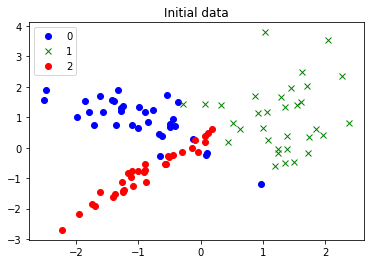

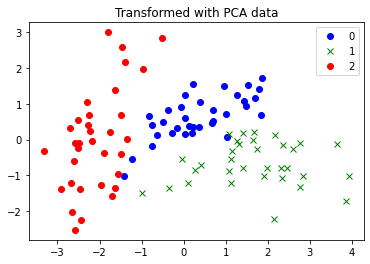

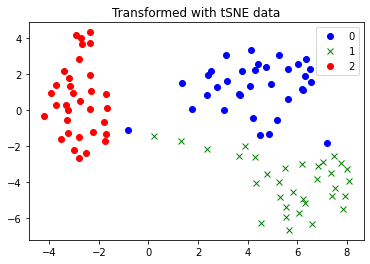

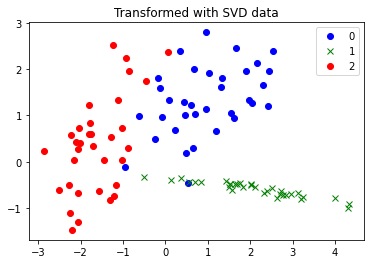

In [5]:
n=2
pca=PCA(n_components=n).fit(X)
x_pca=pca.transform(X)
svd_model=TruncatedSVD(n_components=n).fit(X)
x_svd=svd_model.transform(X)
tsne_transformer=TSNE(n_components=n)
x_tsne=tsne_transformer.fit_transform(X)

print(f" for PCA ", end='')
eval_model(x_pca, y)
print(f" for SVD ", end='')
eval_model(x_svd, y)
print(f" for tSNE ", end='')
eval_model(x_tsne, y)

colors = ['bo', 'gx', 'ro']
num_labels=3

plt.title("Initial data")
for name, label, color in [('class_%d' % i, i, colors[i]) for i in range(num_labels)]:
    plt.plot(X[y == label, 0], X[y == label, 1], color, label=label)
plt.legend(loc=0);
plt.show()

plt.title("Transformed with PCA data")
for name, label, color in [('class_%d' % i, i, colors[i]) for i in range(num_labels)]:
    plt.plot(x_pca[y == label, 0], x_pca[y == label, 1], color, label=label)
plt.legend(loc=0);
plt.show()

plt.title("Transformed with tSNE data")
for name, label, color in [('class_%d' % i, i, colors[i]) for i in range(num_labels)]:
    plt.plot(x_tsne[y == label, 0], x_tsne[y == label, 1], color, label=label)
plt.legend(loc=0);
plt.show()

plt.title("Transformed with SVD data")
for name, label, color in [('class_%d' % i, i, colors[i]) for i in range(num_labels)]:
    plt.plot(x_svd[y == label, 0], x_svd[y == label, 1], color, label=label)
plt.legend(loc=0);
plt.show()

В этом уроке мы познакомились с новым алгоритмом t-SNE. Какие у него есть недостатки?

* требует бережной настройки параметров на валидационной выборке (см. документацию - там очень много параметров)
* плохо работает, когда данных очень много.

На больших объёмах данных (более 10к элементов) следует применять более простые алгоритмы - PCA или SVD.